In [ ]:
# Import necessary Packages
 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import keras.utils

In [ ]:
import numpy as np

In [ ]:
# Get the dataset
fashion_mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data() 	#Keras function

print ("mnist data downloaded...")

mnist data downloaded...


In [ ]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(Y_train)

60000

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(Y_train)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


In [ ]:
#Filter classes for sandal and sneaker
L=[]#List for two classes sandal and sneaker
for i in range(len(Y_train)):
    if (Y_train[i]== 0 or  Y_train[i]== 9): 
        L.append(Y_train[i])
        #print(Y_train[i])

In [ ]:
X_train=X_train[L]
Y_train=Y_train[L]
X_test=X_test[L]
Y_test=Y_test[L]

In [ ]:
# Find the unique numbers from the train labels after applying filters
classes = np.unique(L )
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 9]
Total number of outputs :  2


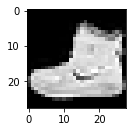

In [ ]:
# This code cell is for visualization of data only...may be skipped

# plot images...subplot function is being used...nice documentation is available on the official webpage of matplotlib
# arguments to subplot functions are number of rows, number of columns and 
# number of subplots in the plot...comma is mandatory if values are less than 10

plt.subplot(221)	
plt.imshow(X_train[100], cmap=plt.get_cmap('gray')) # ploting first image of training data set

# show the plot
plt.show()

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

Train: X=(12000, 28, 28), y=(12000,)
Test: X=(12000, 28, 28), y=(12000,)


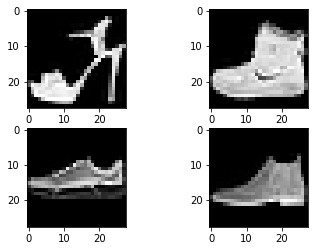

In [ ]:
# This code cell is for visualization of data only...may be skipped

# plot images...subplot function is being used...nice documentation is available on the official webpage of matplotlib
# arguments to subplot functions are number of rows, number of columns and 
# number of subplots in the plot...comma is mandatory if values are less than 10

plt.subplot(221)	
plt.imshow(X_train[0], cmap=plt.get_cmap('gray')) # ploting first image of training data set
plt.subplot(222)
plt.imshow(X_train[134], cmap=plt.get_cmap('gray'))	# ploting 135th image in training data set
plt.subplot(223)
plt.imshow(X_test[244], cmap=plt.get_cmap('gray'))	# ploting 244rth image of test date set
plt.subplot(224)
plt.imshow(X_test[3], cmap=plt.get_cmap('gray'))	# ploting 4th image of test data set

# show the plot
plt.show()

In [ ]:
# Do basic preprocessing of the training data

# reshaping the data 
X_train = X_train.reshape(12000,28,28,1)
X_test = X_test.reshape(12000,28,28,1)

for_final_test = X_test # we will use this for running predictions

# Change the data type from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the images
X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')

X_train shape: (12000, 28, 28, 1)
X_test shape: (12000, 28, 28, 1)
12000 training samples
12000 test samples


In [ ]:
# Convert the class labels to one hot encoded matrix

num_classes = 10 # number of classess for classification 

Y_train = keras.utils.to_categorical(Y_train, num_classes=num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes=num_classes)

print (Y_train.shape)

(12000, 10)


In [ ]:
Y_test.shape

(12000, 10)

In [ ]:
Y_train.shape

(12000, 10)

In [ ]:
len(Y_test)

12000

In [ ]:
# Define model architecture

rows, cols = 28,28
input_shape = (rows, cols, 1)
model = Sequential()

#arch 1
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten()) #Flattens the input, Why ? because we need to connect it to Dense layer
#model.add(Dense(num_classes, activation='softmax'))

# another architecture...you may experiment with the following architecture
#arch 2
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # Flattens the input
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

print ("keep going...")

keep going...


In [ ]:
# compiling model

model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

print ("compile successful...")

compile successful...


In [ ]:

# print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [ ]:
# Now we train the model

batch_size = 128
epochs = 10

# start the training

history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

print ("training done...")

Epoch 1/10
75/75 [==============================] - 20s 265ms/step - loss: 2.2831 - accuracy: 0.1466 - val_loss: 2.1800 - val_accuracy: 0.5071
Epoch 2/10
75/75 [==============================] - 20s 261ms/step - loss: 2.1023 - accuracy: 0.5277 - val_loss: 1.9621 - val_accuracy: 1.0000
Epoch 3/10
75/75 [==============================] - 20s 264ms/step - loss: 1.8734 - accuracy: 0.8605 - val_loss: 1.6998 - val_accuracy: 1.0000
Epoch 4/10
75/75 [==============================] - 20s 262ms/step - loss: 1.5888 - accuracy: 0.9693 - val_loss: 1.3774 - val_accuracy: 1.0000
Epoch 5/10
75/75 [==============================] - 20s 264ms/step - loss: 1.2720 - accuracy: 0.9900 - val_loss: 1.0599 - val_accuracy: 1.0000
Epoch 6/10
75/75 [==============================] - 20s 261ms/step - loss: 0.9825 - accuracy: 0.9957 - val_loss: 0.7751 - val_accuracy: 1.0000
Epoch 7/10
75/75 [==============================] - 20s 261ms/step - loss: 0.7349 - accuracy: 0.9969 - val_loss: 0.5473 - val_accuracy: 1.0000

In [ ]:
# Evaluate the model

score = model.evaluate(X_test, Y_test, verbose=1)
print('loss:', score[0])
print('accuracy:', score[1])

375/375 [==============================] - 7s 18ms/step - loss: 1.7015 - accuracy: 0.5000
loss: 1.7014886140823364
accuracy: 0.5


In [ ]:

sample = for_final_test[0,:,:,:]
sample = sample.reshape(1,28,28,1)
sample.shape
print(Y_test[0])
model.predict_classes(sample)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


array([9], dtype=int64)

In [ ]:
#printing metrices
print (model.metrics_names)

# list all data in history
print(history.history.keys())

['loss', 'accuracy']
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


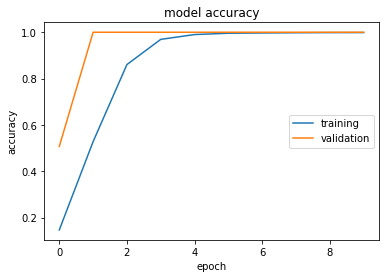

In [ ]:
# to visualize the performance with plots...plot loss and accuracy in training and validation 

# Plot for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()

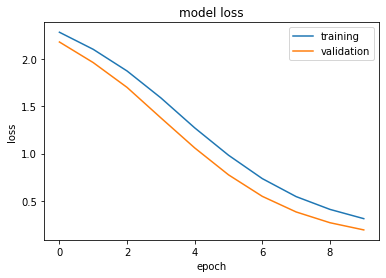

In [ ]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()